# Spectral (Bi/Co)Clustering on ABA

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralBiclustering
from sklearn.cluster import SpectralCoclustering
%matplotlib inline
%run nifti_tools.ipynb

In [2]:
# With variance of 80%
X = np.load('/data/bioprotean/ABA/KernelPCA/poly2/31512_80v_components.npy')

start_time = time.time()

n_clusters = 200
SB = SpectralCoclustering(n_clusters=n_clusters).fit(X)

print('Running time is ', (time.time() - start_time))

Running time is  56.56173372268677


In [3]:
labels = SB.row_labels_

In [4]:
# Reconstructing the clusters
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

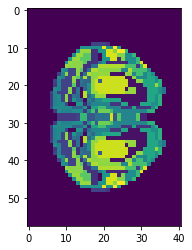

In [6]:
# Visualizing slices
slice = labels_rc[20,:,:]
plt.imshow(slice)

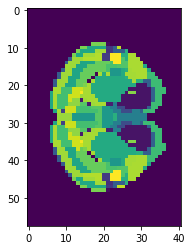

In [7]:
# Loading annotations
annot_path = '/data/bioprotean/ABA/PCA/80_variance/allen_annot200.nii'
annot_arr = nifti_to_array(annot_path)

# Visualizing slices
slice = annot_arr[20,:,:]
threshold = (slice<10000) * slice
plt.imshow(threshold)